# DATA EXPLORATION

In [1]:
# Import pandas
import pandas as pd

data = pd.read_csv('Data/Train.csv', index_col='id')
# print(data.head())
# print(data.info())
# print(data.describe())
# print(data.dtypes.value_counts())

# Convert data['category'] to a categorical type
data['category'] = data['category'].astype('category')
print(data['category'].dtypes)

category


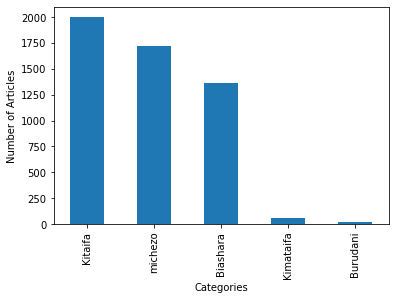

In [2]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

data['category'].value_counts().plot(kind='bar')

# Label the axes
plt.xlabel('Categories')
plt.ylabel('Number of Articles')

# Display the plot
plt.show()

# TRAINING MODEL

In [20]:
# Import other necessary modules
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.svm import SVC

# Split out  data
X_train, X_test, y_train, y_test = train_test_split(data['content'],
                                                    pd.get_dummies(data['category']), 
                                                   random_state=1,
                                                   test_size=0.2,
                                                   shuffle=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC, norm=None, binary=False, ngram_range=(1, 2))),
        ('clf', OneVsRestClassifier(SVC()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

Pipeline(steps=[('vec',
                 HashingVectorizer(ngram_range=(1, 2), norm=None,
                                   token_pattern='[A-Za-z0-9]+(?=\\s+)')),
                ('clf', OneVsRestClassifier(estimator=SVC()))])

# TESTING MODEL

In [21]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy of model: ", accuracy)


Accuracy of model:  0.8031037827352085


# PREPARATION FOR ZINDI SUBMISSION

In [ ]:
# read test data in pd.dataframe
testData = pd.read_csv('Data/Test.csv', index_col='swahili_id')
# print(testData.head())

prediction = pl.predict(testData['content'])

# Prep the prediction for submission
submission =  pd.DataFrame(prediction, columns = ['biashara', 'burudani', 'kimataifa', 'kitaifa', 'michezo'])
submission.index = testData.index
submission.index.rename('test_id', inplace=True)

# Rearrange columns to match submission guidelines
submission = submission[["kitaifa", "michezo", "biashara", "kimataifa", "burudani"]]
print(submission.head())

# Save to submission.csv
submission.to_csv('Submission.csv')